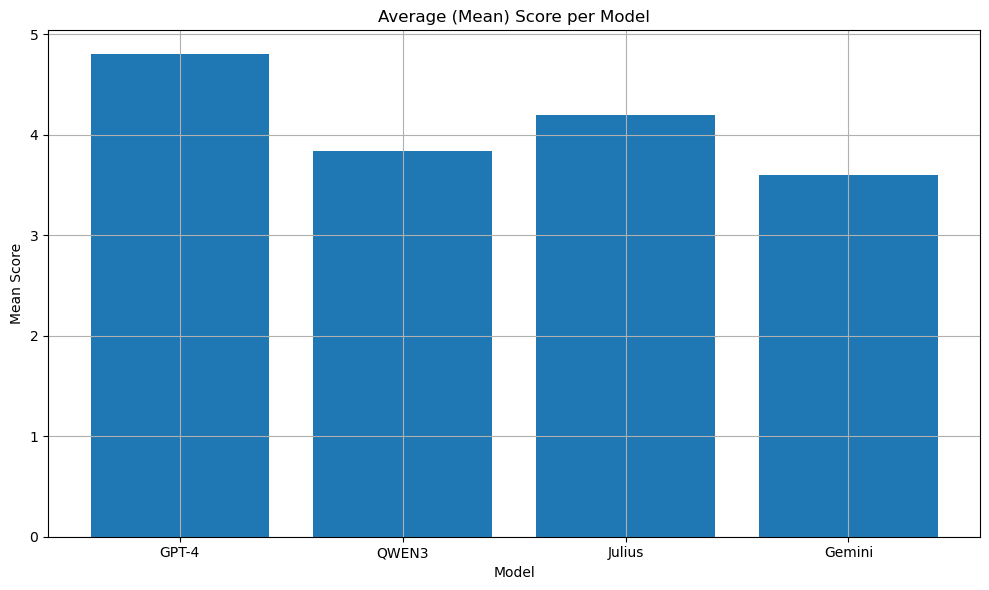

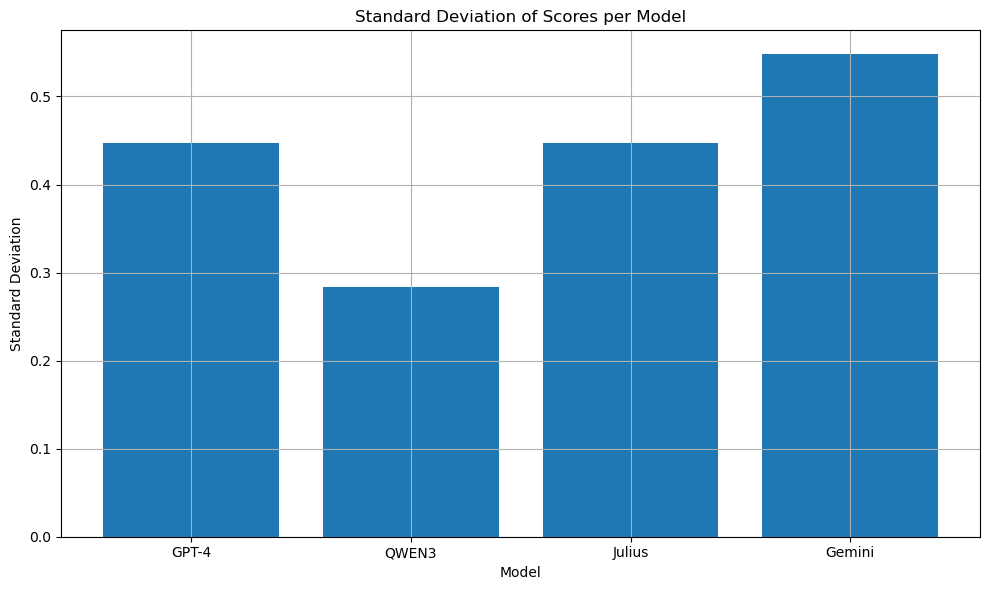

ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset from the table
data = {
    "Model": ["GPT-4", "QWEN3", "Julius", "Gemini"],
    "Code Correctness": [5.0, 4.04, 5.0, 3.0],
    "Visualisation Quality": [4.0, 3.82, 4.0, 4.0],
    "Insight Clarity": [5.0, 3.36, 4.0, 4.0],
    "Prompt Specificity": [5.0, 4.0, 4.0, 4.0],
    "Prompt Scalability": [5.0, 4.0, 4.0, 3.0]
}

df = pd.DataFrame(data)

# Calculate mean, std deviation, and average score for each model
df["Mean Score"] = df.iloc[:, 1:].mean(axis=1)
df["Standard Deviation"] = df.iloc[:, 1:-1].std(axis=1)

# Plot bar chart for Mean Score
plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["Mean Score"])
plt.title("Average (Mean) Score per Model")
plt.ylabel("Mean Score")
plt.xlabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot bar chart for Standard Deviation
plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["Standard Deviation"])
plt.title("Standard Deviation of Scores per Model")
plt.ylabel("Standard Deviation")
plt.xlabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Statistics", dataframe=df)

df.describe()


In [2]:
df.describe()

,Code Correctness,Visualisation Quality,Insight Clarity,Prompt Specificity,Prompt Scalability,Mean Score,Standard Deviation
count,4.000000,4.000,4.000000,4.00,4.000000,4.000000,4.000000
mean,4.260000,3.955,4.090000,4.25,4.000000,4.111000,0.431460
std,0.954149,0.090,0.677545,0.50,0.816497,0.521233,0.109315
min,3.000000,3.820,3.360000,4.00,3.000000,3.600000,0.283690
25%,3.780000,3.955,3.840000,4.00,3.750000,3.783000,0.406333
50%,4.520000,4.000,4.000000,4.00,4.000000,4.022000,0.447214
75%,5.000000,4.000,4.250000,4.25,4.250000,4.350000,0.472341
max,5.000000,4.000,5.000000,5.00,5.000000,4.800000,0.547723


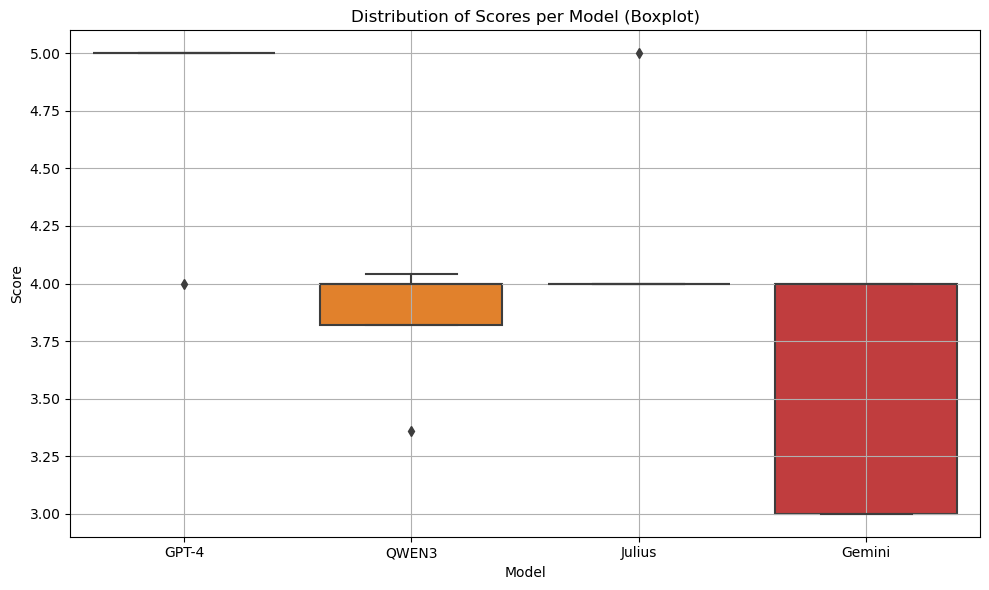

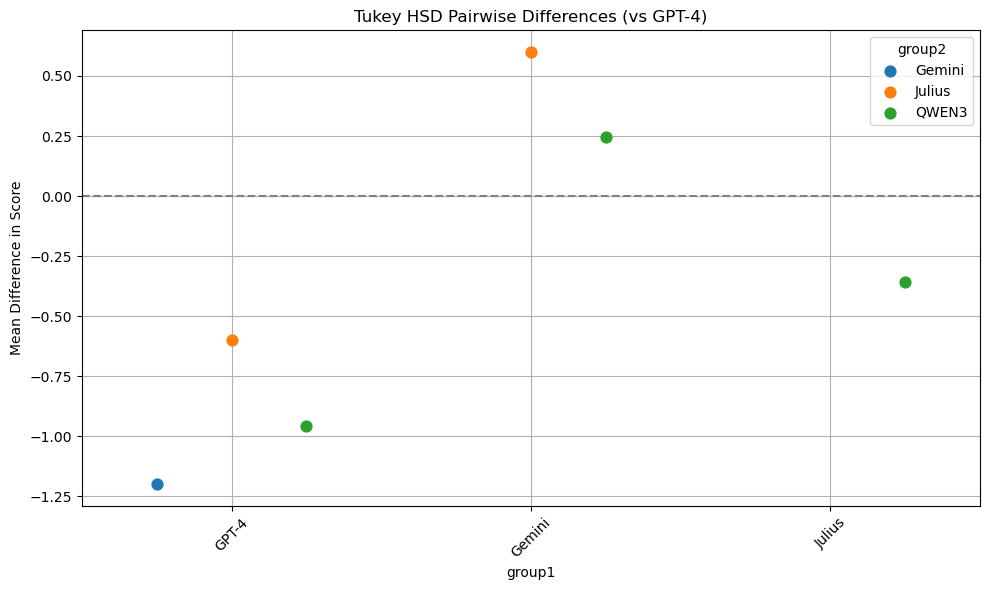

NameError: name 'tools' is not defined

In [3]:
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape data to long format for statistical testing
df_long = df.melt(id_vars=["Model"], 
                  value_vars=["Code Correctness", "Visualisation Quality", "Insight Clarity", 
                              "Prompt Specificity", "Prompt Scalability"],
                  var_name="Metric", value_name="Score")

# Run ANOVA to test overall model effect
anova_model = ols("Score ~ C(Model)", data=df_long).fit()
anova_results = anova_lm(anova_model)

# Tukey HSD test to determine pairwise significance
tukey_results = pairwise_tukeyhsd(endog=df_long["Score"], groups=df_long["Model"], alpha=0.05)

# Plot boxplot for model scores
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="Score", data=df_long)
plt.title("Distribution of Scores per Model (Boxplot)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Tukey HSD result
tukey_summary_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
plt.figure(figsize=(10, 6))
sns.pointplot(x='group1', y='meandiff', hue='group2', data=tukey_summary_df, dodge=0.5, join=False)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Tukey HSD Pairwise Differences (vs GPT-4)')
plt.ylabel('Mean Difference in Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

tools.display_dataframe_to_user(name="ANOVA Summary", dataframe=anova_results)
tools.display_dataframe_to_user(name="Tukey HSD Results", dataframe=tukey_summary_df)
